In [142]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [143]:
df = pd.read_csv('insurance_data.csv')

In [144]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


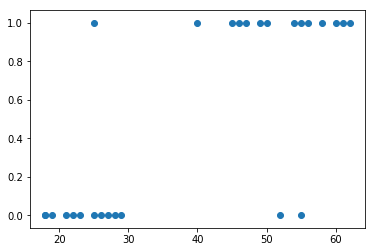

In [145]:
plt.scatter(df.age,df.bought_insurance)

In [146]:
xtrain , xtest , ytrain , ytest = train_test_split(df[['age']],df['bought_insurance'],train_size = 0.9)

In [147]:
xtrain.shape[0] , ytrain.shape[0] , xtest.shape[0] , ytest.shape[0]

(24, 24, 3, 3)

In [148]:
lr = LogisticRegression()

In [149]:
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [150]:
lr.predict(xtest)

array([0, 1, 0], dtype=int64)

In [151]:
lr.score(xtest,ytest)

1.0

In [152]:
# predict probability function returns the value probability of feature being in one class vs the other.
# The first index refers to the probability that the data belong to class 0, and the second refers to the 
# probability that the data belong to class 1.
lr.predict_proba(xtest)

array([[0.51922583, 0.48077417],
       [0.26409013, 0.73590987],
       [0.54534274, 0.45465726]])

# Exercise

### * Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
### * Plot bar charts showing impact of employee salaries on retention
### * Plot bar charts showing corelation between department and employee retention
### * Now build logistic regression model using variables that were narrowed down in step 1
### * Measure the accuracy of the model

## Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

In [168]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


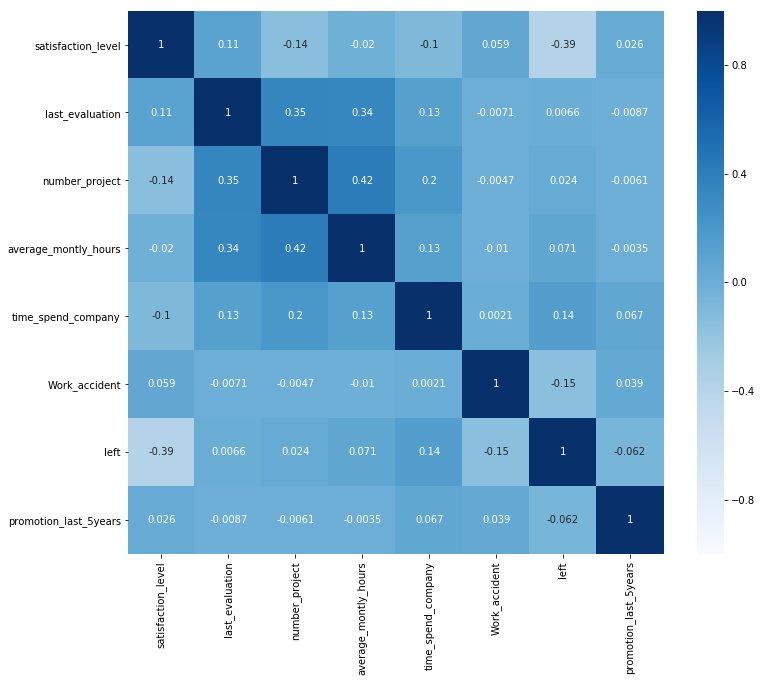

In [154]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, vmax = 1, vmin = -1,cmap = 'Blues',center = 0 )

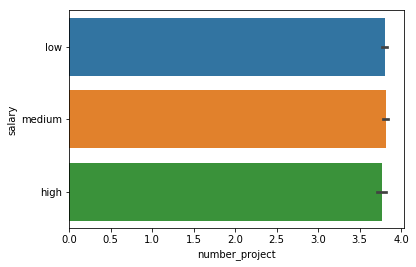

In [155]:
sns.barplot(df.number_project, df.salary)

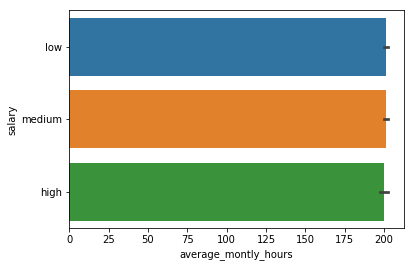

In [156]:
sns.barplot(df.average_montly_hours, df.salary)

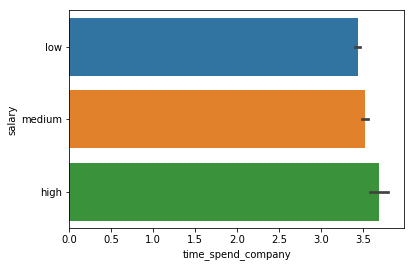

In [157]:
sns.barplot(df.time_spend_company, df.salary)


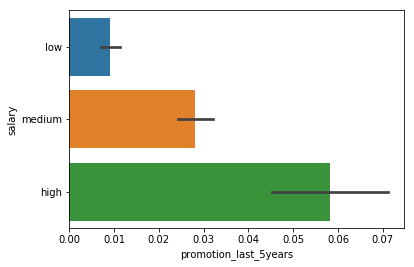

In [121]:
sns.barplot(df.promotion_last_5years, df.salary)

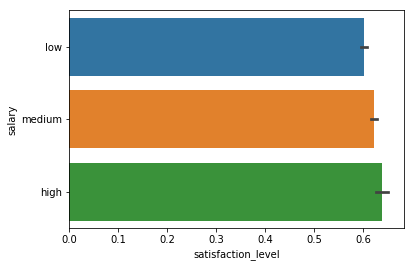

In [122]:
sns.barplot(df.satisfaction_level, df.salary)

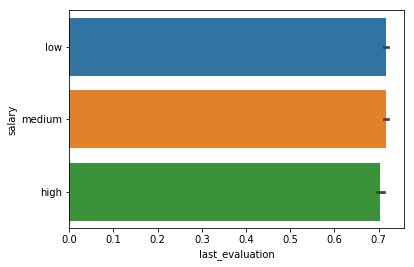

In [124]:
sns.barplot(df.last_evaluation, df.salary)

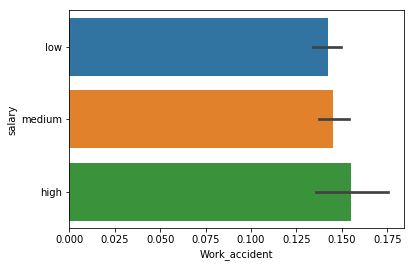

In [127]:
sns.barplot(df.Work_accident, df.salary)

## Training the Model

In [169]:
df = df[['time_spend_company','satisfaction_level','promotion_last_5years','Work_accident','left','salary']]
df.head()

,time_spend_company,satisfaction_level,promotion_last_5years,Work_accident,left,salary
0,3,0.38,0,0,1,low
1,6,0.80,0,0,1,medium
2,4,0.11,0,0,1,medium
3,5,0.72,0,0,1,low
4,3,0.37,0,0,1,low


In [170]:
df[['high','low','medium']] = pd.get_dummies(df.salary)
df.head()

,time_spend_company,satisfaction_level,promotion_last_5years,Work_accident,left,salary,high,low,medium
0,3,0.38,0,0,1,low,0,1,0
1,6,0.80,0,0,1,medium,0,0,1
2,4,0.11,0,0,1,medium,0,0,1
3,5,0.72,0,0,1,low,0,1,0
4,3,0.37,0,0,1,low,0,1,0


In [171]:
df = df.drop('salary',axis=1)
df.head()

,time_spend_company,satisfaction_level,promotion_last_5years,Work_accident,left,high,low,medium
0,3,0.38,0,0,1,0,1,0
1,6,0.80,0,0,1,0,0,1
2,4,0.11,0,0,1,0,0,1
3,5,0.72,0,0,1,0,1,0
4,3,0.37,0,0,1,0,1,0


In [175]:
x = df.drop('left', axis=1)
y = df['left']

In [178]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y)

In [179]:
model = LogisticRegression()

In [180]:
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [182]:
model.predict(xtest)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [183]:
model.score(xtest,ytest)

0.7664